# Exemples d'utilisation de [cpmpy](https://cpmpy.readthedocs.io/en/latest/beginner_tutorial.html)

In [1]:
from cpmpy import *

## 1. Princes
Dix princes transformés en batraciens sont répartis en trois groupes
d'au maximum 5 individus : les grenouilles, les rainettes et les crapauds.  

Pour se saluer, on s’embrasse.  
Les grenouilles se saluent en échangeant 4 bises, les rainettes n’en
échangent que 2, et les crapauds, 3.  
C’est toujours le nombre de bises de celui qui en fait le moins qui est
compté.  
Au sein d’un même groupe, on ne s’embrasse pas.  
Lorsque les dix batraciens se sont retrouvés, il y a eu 75 bises.

Combien y a-t-il de grenouilles, de rainettes et de crapauds ?

In [2]:
g, r, c = intvar(1,5), intvar(1,5), intvar(1,5)

_ = Model([
        g + r + c == 10,
        2 * r * c + 3 * g * c + 2 * g * r == 75 
    ]).solveAll(display = lambda: print(f'g = {g.value()}, r = {r.value()}, c = {c.value()}'))

g = 3, r = 4, c = 3


## 2. [enigma 203](https://enigmaticcode.wordpress.com/2023/01/06/puzzle-203-multiple-magic/)
Trouver une matrice $X\in M_3(\mathbf N^*)$ telle que les produits des éléments de chaque ligne, de chaque colonne et de chacune des 2 diagonales soient les mêmes et que ce produit soit le plus petit possible.

In [3]:
# la matrice :
x = intvar(1,256, shape = (3,3), name = 'x')

# le produit commun
p = intvar(1,500, name = 'p')

m = Model(alldifferent(x))

m += [x[i,0] * x[i,1] * x[i,2] == p for i in range(3)] + \
     [x[0,j] * x[1,j] * x[2,j] == p for j in range(3)] + \
     [x[0,0] * x[1,1] * x[2,2] == p,
      x[0,2] * x[1,1] * x[2,0] == p]
  
m.minimize(p)

m.solve()
print(f'produit = {p.value()}\nX =\n{x.value()}')

produit = 216
X =
[[ 2  9 12]
 [36  6  1]
 [ 3  4 18]]


## 3. [Calcul infernal](http://www.hakank.org/cpmpy/calculs_d_enfer.py)
Trouver des affectations de a, c, d, e, f, h, i, n, o, p, q, r, s, t, u, x, z $\in\{0,\pm1,\ldots,\pm16\}$ telles que z + e + r + o = 0, u + n = 1, $\ldots$ , t + r + e + i + z + e = 13 et que les 17 entiers a, c, etc. soient distincts.

In [4]:
def calcul_infernal():

    noms =  'a','c','d','e','f','h','i','n','o','p','q','r','s','t','u','x','z'
    A = [a,c,d,e,f,h,i,n,o,p,q,r,s,t,u,x,z] = [intvar(-16,16, name = x) for x in noms]

    model = Model([
        AllDifferent(A),
        z+e+r+o     == 0,
        u+n         == 1,  
        d+e+u+x     == 2,
        t+r+o+i+s   == 3,
        q+u+a+t+r+e == 4,
        c+i+n+q     == 5,
        s+i+x       == 6,
        s+e+p+t     == 7,
        h+u+i+t     == 8,
        n+e+u+f     == 9,
        d+i+x       == 10,
        o+n+z+e     == 11,
        d+o+u+z+e   == 12,
        t+r+e+i+z+e == 13
        ]
    )

    def print_sol():   
        for j in A: print(f'{j.name} = {j.value()}', end = ', ')
        print()

    model.solveAll(display=print_sol)

calcul_infernal()

a = -2, c = -16, d = 16, e = -1, f = 9, h = 11, i = 0, n = 8, o = -10, p = -8, q = 13, r = -3, s = 12, t = 4, u = -7, x = -6, z = 14, 
a = 1, c = -13, d = 16, e = -1, f = 9, h = 11, i = 0, n = 8, o = -10, p = -8, q = 10, r = -3, s = 12, t = 4, u = -7, x = -6, z = 14, 
a = 5, c = -9, d = 16, e = -1, f = 9, h = 11, i = 0, n = 8, o = -10, p = -8, q = 6, r = -3, s = 12, t = 4, u = -7, x = -6, z = 14, 
a = 15, c = 1, d = 16, e = -1, f = 9, h = 11, i = 0, n = 8, o = -10, p = -8, q = -4, r = -3, s = 12, t = 4, u = -7, x = -6, z = 14, 
a = 10, c = -4, d = 16, e = -1, f = 9, h = 11, i = 0, n = 8, o = -10, p = -8, q = 1, r = -3, s = 12, t = 4, u = -7, x = -6, z = 14, 


## 3. Entre chats et chien
[Championnat International des Jeux Mathématiques et Logiques, 1999, exercice 5](https://cdn.eu.yapla.com/company/CPYlKW3zLaj6BkeZEMsOhQ7bD/asset/files/archivesChampionnatJM/champ1999/demi%20finale.pdf)

Mathias doit deviner le nom d'un animal (en cinq lettres).  

| | | | | | | B|M |
| :--| :--| :--| :--| :--| :--| :--| :--|
|C |H |A |T |S |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|0  |2 | 
|L |I |O |N |S ||1  |0 |  
|T |I |G |R |E ||2  |0 |
|P |A |O |N |S ||0 |0 |
|B |O |E |U |F ||1 |1 |
|C |H |I |E |N ||0 |4 |


Il a proposé à Mathilde les noms d'animaux ci-dessus, et, à chaque fois, elle lui a répondu en
donnant, dans cet ordre, le nombre de lettres justes et **B**ien placées, et le nombre de lettres
justes mais **M**al placées. 

Quel est le nom de l'animal à deviner?

In [5]:
def car(code): return chr(code + ord('A'))
def code(car): return ord(car) - ord('A')

# p[i, code(c)] ssi la i-ème lettre du mot cherché est c 
p = boolvar(shape = (5,26))

# pour tout i, la i-ème lettre est unique
model = Model([(sum(p[i,j] for j in range(26)) == 1) for i in range(5)])

# les lettres du mot cherché sont différentes
model += [p[i1,j].implies(~p[i2,j]) for i1 in range(5) for i2 in range(5) for j in range(26) if i1 < i2]

def addProposition(animal, n, m):
    global model
    k = [code(car) for car in animal]
    # lettres bien placées
    model += sum(p[i,k[i]] for i in range(5)) == n
    # lettres mal placées
    model += sum(p[i,k[j]] for i in range(5) for j in range(5) if j != i) == m
    
addProposition('CHATS', 0, 2)
addProposition('LIONS', 1, 0)
addProposition('TIGRE', 2, 0)
addProposition('PAONS', 0, 0)
addProposition('BOEUF', 1, 1)
addProposition('CHIEN', 0, 4)

def display():
    animal = ''
    for i in range(5):
        for j in range(26):
            if p[i,j].value(): animal += car(j)
    print(animal, end = ' ')

model.solveAll(display = display)

BIHCE BICHE HICUE 

3

Réponse : BICHE

## 4 [Le problème de Claude Berge](https://omnilogie.fr/O/Qui_a_tu%C3%A9_le_duc_de_Densmore_?)
Pour l'histoire complète, voir [Qui a tué le duc de Densmore ?](./berge.pdf)

Pour résoudre le problème, on peut, soit comme le fait Turner Smith dans le récit de Berge, utiliser le théorème de Hajos sur les graphes d'intervalles, soit, comme on va le faire, écrire une fonction python qui teste si un graphe (pas trop grand) est un graphe d'intervalles.  On considère alors les 8 graphes obtenus en supprimant un des 8 sommets du graphe initial. Si un et un seul de ces 8 graphes est un graphe d'intervalles, il correspond à la coupable.

In [6]:
from cpmpy import *

def graphe_intervalles(g):
    n = len(g)
    keys = list(g.keys())
    left = intvar(0, n - 1, shape = n, name = 'left')
    right = intvar(1, n, shape = n, name = 'right')
    m = Model()
    for i, s in enumerate(keys):
        m += left[i] < right[i]
        for j in range(i + 1, n):
            if keys[j] in g[s]:
                m += [left[j] < right[i], left[i] < right[j]]
            else:
                m += (left[j] >= right[i]) | (left[i] >= right[j])
    return m.solve()

def supprime_sommet(g,s):
    return {t : g[t] - {s} for t in g.keys() if t != s}

def coupable(g):
    l = [s for s in g.keys() if graphe_intervalles(supprime_sommet(g,s))]
    if len(l) == 1:
        return l[0]

In [7]:
g_densmore = {
    'A' : {'B', 'C', 'E', 'F', 'G'},
    'B' : {'A', 'C', 'H'},
    'C' : {'A', 'B', 'D', 'E', 'H'},
    'D' : {'C', 'E'},
    'E' : {'A', 'C', 'D', 'F'},
    'F' : {'A', 'E'},
    'G' : {'A', 'H'},
    'H' : {'B', 'C', 'G'},
}

noms = {
    'A' : 'Ann',
    'B' : 'Betty',
    'C' : 'Cynthia',
    'D' : 'Diana',
    'E' : 'Emily',
    'F' : 'Felicia',
    'G' : 'Georgia',
    'H' : 'Helen'
}

print(f'La coupable est {noms[coupable(g_densmore)]}.')

La coupable est Ann.


## 5. Marche du fou
On pose un fou en H1 (case blanche en bas à droite) sur un échiquier.

Déterminer un trajet de ce fou partant de H1 et aboutissant à A8 qui traverse chacune des cases blanches au moins une fois, ne passe qu'au plus une fois par chaque coin de case et qui, durant son trajet, change le moins possible de direction.

### Affichage d'une solution
#### Mise en place

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'

#### Affichage de l'échiquier

In [9]:
def displayChessBoard(ax):
    
    ax.axis('off')
    ax.axis('equal')

    kwargs = {'color' : 'lightgrey', 'linewidth' : 1.}
    for i in [0,8]:
        ax.plot([i-.5, i-.5],[-.5, 8 - .5],**kwargs)
    for j in [0,8]:
        ax.plot([-.5, 8 - .5],[j - .5, j - .5],**kwargs)
    for i in range(8):
        for j in range(8):
            if not (i + j) %  2:
                ax.add_patch(plt.Rectangle((i - .5, j - .5), 1 , 1, fill = True, fc = 'lightgrey'))


#### puis de la solution

In [10]:
def displaySol(p,q):
    
    n = len(p)
    
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111)

    displayChessBoard(ax)

    ax.plot(p[0],q[0],'go')
    ax.plot(p[-1],q[-1],'go')

    def chgt(k):
        if k == 0 or k == n - 1:
            return False
        return (p[k + 1] + p[k - 1] != 2 * p[k]) | (q[k + 1] + q[k - 1] != 2 * q [k])
    
    d = 1.414
    for k in range(n - 1):
        # tracé du "segment" M[k],M[k+1]
        milieu = (.5 * (p[k] + p[k + 1]), .5 * (q[k] + q[k + 1]))
        if chgt(k):
            c = (.5 * (p[k - 1] + p[k + 1]), .5 * (q[k - 1] + q[k + 1]))
            t1, t2 = \
                (45, 135) if q[k] > c[1] else \
                (-135, -45) if q[k] < c[1] else \
                (-45, 45) if p[k] > c[0] else \
                (135,-135)
            ax.add_patch(matplotlib.patches.Arc(c, d, d, theta1 = t1, theta2 = t2, lw = 1, ec = 'g'))
        else: 
            ax.plot([p[k],milieu[0]],[q[k],milieu[1]],'g-')
        if not chgt(k + 1):
            ax.plot([milieu[0], p[k + 1]],[milieu[1], q[k + 1]], 'g-', lw = 1)
    
    plt.show()

#### Test

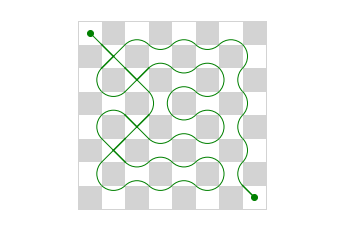

In [11]:
p = [7,6,7,6,7,6,7,6,5,4,3,2,1,0,1,2,3,4,5,6,5,4,3,4,5,6,5,
              4,3,2,1,0,1,2,3,4,5,6,5,4,3,2,1,0,1,2,3,2,1,0]

q = [0,1,2,3,4,5,6,7,6,7,6,7,6,5,4,5,6,5,6,5,4,5,4,3,4,3,2,
              3,2,3,4,3,2,1,2,1,2,1,0,1,0,1,0,1,2,3,4,5,6,7]

displaySol(p,q) # ce n'est pas une solution : 40 changements de direction

### Calculs (LONGS)
Le nombre $n$ de cases visitées ($1$ + le nombre de déplacements) est pair et  
comme il faut visiter les $32$ cases blanches, $n \geqslant 32$.  
De plus il y a $49$ coins donc $n \leqslant 50$.

n = 32, pas de solution

n = 34, pas de solution

n = 36, 24 changements de direction


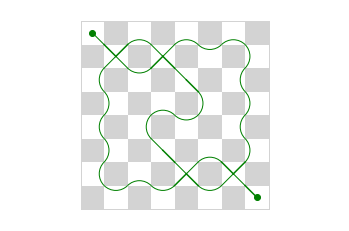

n = 38, 20 changements de direction


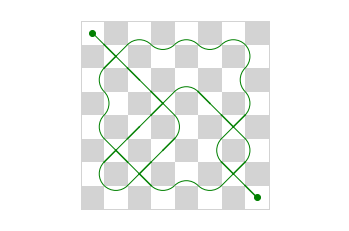

n = 40, 18 changements de direction


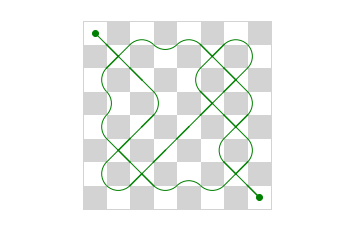

n = 42, 18 changements de direction


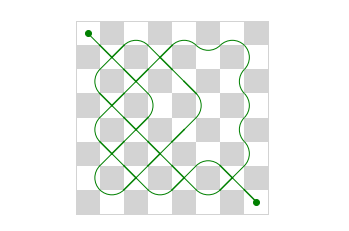

n = 44, 16 changements de direction


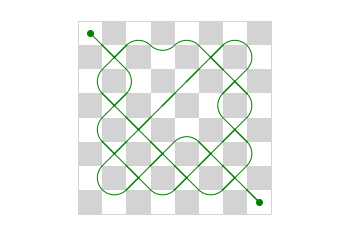

n = 46, 16 changements de direction


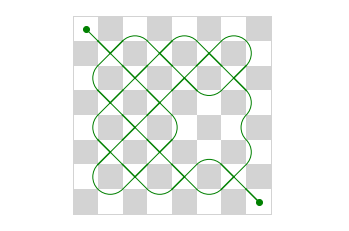

n = 48, pas de solution

n = 50, 18 changements de direction


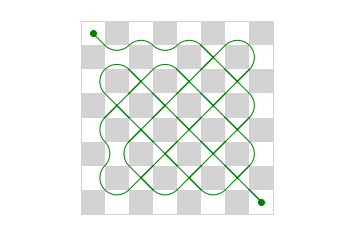

In [36]:
# --- LONG --- (supprimer le cas n = 48 pour une éxecution plus rapide)

for n in range(32,51):

    if n % 2 == 0:
        
        # (p[k],q[k]) est l'emplacement du fou à la k-ième étape
        p = intvar(0, 7, shape = n)
        q = intvar(0, 7, shape = n)

        m = Model()

        # Case de départ
        m += [p[0] == 7 , q[0] == 0]

        # Case d'arrivée
        m += [p[n - 1] == 0 , q[n - 1] == 7]

        # Cheminement en diagonale
        m += [(abs(p[k + 1] - p[k]) == 1) & (abs(q[k + 1] - q[k]) == 1) for k in range(n - 1)]

        # Toutes les cases blanches doivent être visitées
        m += [any([(p[k] == i) & (q[k] == j) for k in range(n)]) \
              for i in range(8) for j in range(8) if (i + j) % 2 == 1]

        # On passe au plus une fois par un coin donné
        m += alldifferent([p[k] + p[k + 1] + 16 * (q[k] + q[k + 1]) for k in range(n - 1)])

        # Minimisation du nombre de changements de direction
        def chgt(k):
            return (p[k + 2] + p[k] != 2 * p[k + 1]) | (q[k + 2] + q[k] != 2 * q [k + 1])
        chgts = intvar(10,25)
        m += chgts == sum([chgt(k) for k in range(n - 2)])
        m.minimize(chgts)   

        if m.solve():

            print(f'n = {n}, {chgts.value()} changements de direction')
            displaySol(p.value(),q.value())
            
        else: 
            
            print(f'n = {n}, pas de solution\n')
